# <font color='#d50283'>IT Academy - Data Science </font>
## Sprint 7 Tarea 1 - Hypothesis Testing
### Luis Ortas

***
## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la

Utilizaremos el dataset del sprint 5.Utilizaremos el datashhet utilizado en el Sprint 5. Que incluye los atletas y los resultados en los juegos olimpicos en los últimos 120 años

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df=pd.read_csv('athlete_events.csv',dtype={'Age':'Int64'},index_col='ID')
## pasamos a Int64, ya que al haber NaN se trasforma en float64
df.sample(10)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
22373,"Stephen ""Steve"" Colgate",M,33,180.0,70.0,United States,USA,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed 5.5 metres,NaN
82182,Niccol Giovanni Pietro Mornati,M,27,197.0,97.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Men's Coxless Fours,NaN
135352,Attila Zubor,M,29,191.0,92.0,Hungary,HUN,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
19305,Paola Celli,F,24,168.0,58.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Synchronized Swimming,Synchronized Swimming Women's Solo,NaN
119010,Elbrus Soslanovych Tedieiev,M,21,167.0,66.0,Ukraine,UKR,1996 Summer,1996,Summer,Atlanta,Wrestling,"Wrestling Men's Featherweight, Freestyle",Bronze
81385,Andr Monnier,M,25,NaN,NaN,France,FRA,1952 Winter,1952,Winter,Oslo,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
45703,Ernst Henry Theodor Hansen,M,39,NaN,NaN,Denmark,DEN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
37557,Masaya Fukuda,M,22,176.0,61.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Fencing,"Fencing Men's Foil, Team",NaN
43292,Bernard Gruener,M,19,178.0,74.0,France,FRA,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [3]:
display(df.info())
display(df.describe())
print(f'Tamaño: {df.shape}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  Int64  
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(10)
memory usage: 31.3+ MB


None

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


Tamaño: (271116, 14)


Estudiaremos el atributo de altura.

In [4]:
# Eliminamos los registros en que la altura sea na.
df=df.dropna(subset=['Height'])

**Comprobamos si 'Height' sigue un distribución normal:**

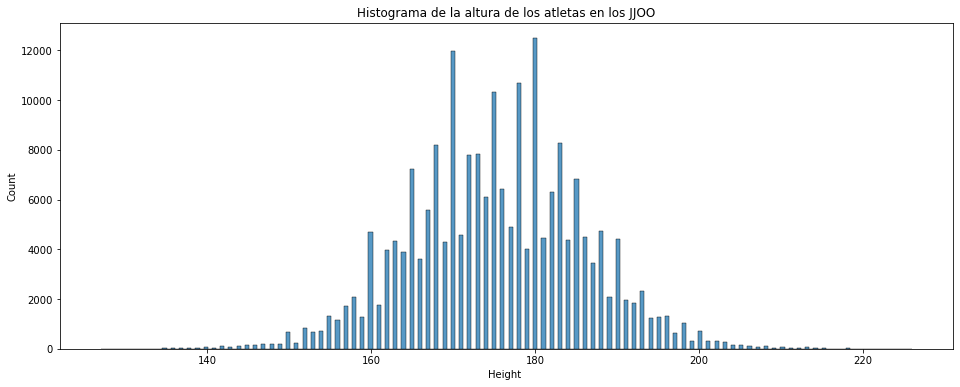

In [5]:
# Histograma de la altura de los atletas en la historia de los JJOO
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='Height')

plt.title('Histograma de la altura de los atletas en los JJOO');
plt.xlabel('Height ');

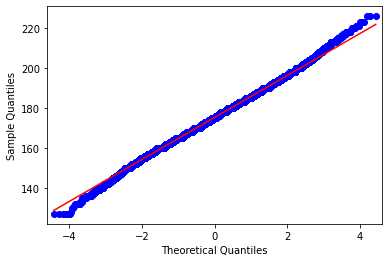

In [6]:

# QQ Plot

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
Height=df.Height # definimos la variable Height
qqplot(Height, line='s')
pyplot.show()

In [7]:
## Función test de normalidad.

def test_normalidad(atributo):
    
    '''Realizamos tes de normalidad con tres test'''
    from scipy.stats import shapiro
    from scipy.stats import normaltest
    from scipy.stats import anderson
    
    stat, p = shapiro(atributo)
    
    print('Shapiro-Wilk: \n')
    print('stat=%.3f, p=%.3f' % (stat, p))


    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    print('---------- \n')

    # Example of the D'Agostino's K^2 Normality Test


    stat, p = normaltest(atributo)
    
    print('D\'Agostino K\^2 Normality: \n')
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    print('---------- \n')

# Example of the Anderson-Darling Normality Test


    result = anderson(atributo)
    
    print('Anderson-Darling: \n')
    print('stat=%.3f' % (result.statistic))
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print('Probably Gaussian at the %.1f%% level' % (sl))
        else:
            print('Probably not Gaussian at the %.1f%% level' % (sl))
        
    print('---------- \n')


In [8]:
test_normalidad(df.Height)

Shapiro-Wilk: 

stat=0.998, p=0.000
Probably not Gaussian
---------- 

D'Agostino K\^2 Normality: 

stat=246.893, p=0.000
Probably not Gaussian
---------- 

Anderson-Darling: 

stat=129.972
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
---------- 



D:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Los tes nos indican que no sigue una distribución normal. Agruparemos por genero y deporte (Atletismo)

In [9]:
df.Sport.unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Athletics', 'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon',
       'Gymnastics', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Rowing', 'Bobsleigh', 'Swimming', 'Football',
       'Equestrianism', 'Shooting', 'Taekwondo', 'Boxing', 'Fencing',
       'Diving', 'Canoeing', 'Water Polo', 'Tennis', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Golf',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton', 'Rugby',
       'Art Competitions', 'Tug-Of-War', 'Lacrosse', 'Polo',
       'Motorboating', 'Jeu De Paume', 'Racquets'], dtype=object)

In [10]:
df_m_At=df[(df['Sex']=="M")&(df['Sport']=='Athletics')]

In [11]:
test_normalidad(df_m_At.Height)

Shapiro-Wilk: 

stat=0.998, p=0.000
Probably not Gaussian
---------- 

D'Agostino K\^2 Normality: 

stat=0.906, p=0.636
Probably Gaussian
---------- 

Anderson-Darling: 

stat=22.307
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level
---------- 



El test de Agostino indica que probablemente sigue una distribución normal.

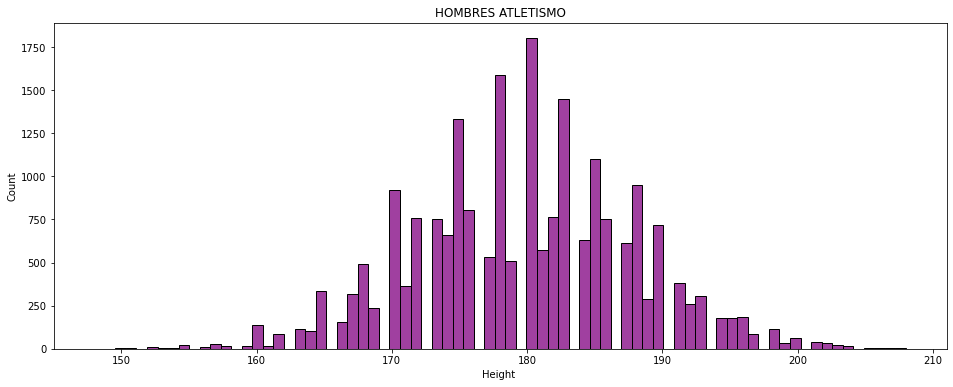

In [12]:
# Histograma de la altura de los atletas en la historia de los JJOO
plt.figure(figsize=(16, 6))
sns.histplot(data=df_m_At, x='Height',color='purple')

plt.title('HOMBRES ATLETISMO');
plt.xlabel('Height ');

***
**Calcula el p-valor y di  si rechaza la hipoteisi nulla tomando un alfa de 5%:**

In [13]:
print(f'La media de la altura es {df_m_At.Height.mean():.3f}')

La media de la altura es 179.768


Hipotesis:
- $H_0: \mu_M = 179$  La altura media de los ateletas de atletismo es 179.
- $H_1: \mu_M \neq 19$ La altura media de los atletas de altetismos NO es 179

In [14]:
# Utilizamo 1 sample t-test

ALPHA = 0.05

stat, p = ttest_1samp(df_m_At.Height, popmean=179)

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

t-statistic = 13.956
p-value = 0.000
We can reject H0


**Conclusión: 
Podemos rechazar la hipotesis nula.**

***
## Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

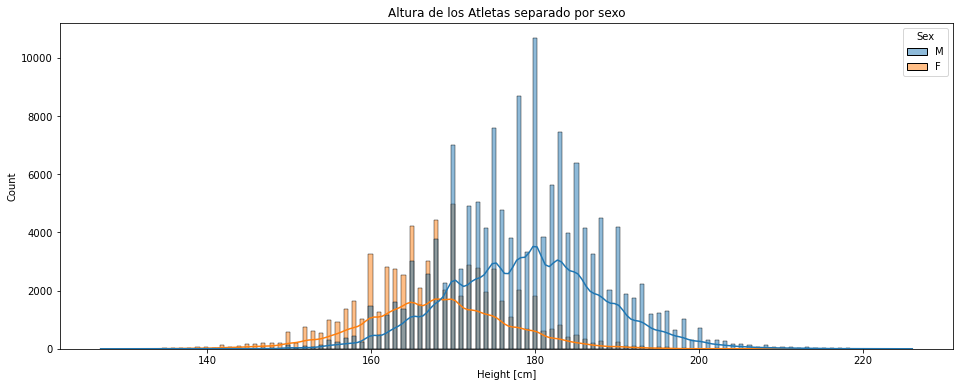

In [59]:
# Histograma de la distribució sw peso de los 
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='Height', hue='Sex', kde=True)

plt.title('Altura de los Atletas separado por sexo');
plt.xlabel('Height [cm]');

In [16]:
# Utilitzsem la prova 2-tailed Welchs' t-test (equivalent a Student's t-test però
# quan no podem assegurar que dues poblacions tinguin mateixa variança)

ALPHA = 0.05

height_males = df.loc[df.Sex=='M','Height']
height_females = df.loc[df.Sex=='F','Height']

stat, p = ttest_ind(height_males,height_females, alternative='two-sided', equal_var=False)

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

t-statistic = 263.097
p-value = 0.000
We can reject H0


Hipotesis:
- $H_0: \mu_1 = \mu_2$  La altura media de los atletas en la primera mitad del siglo 20 **es igual** a la altura media de los atletas en la segunda mitad del siglo 20.
- $H_1: \mu_1 <\mu_2$ La altura media de los atletas en la primera mitad del siglo 20 **es diferente** a la altura media de los atletas en la segunda mitad del siglo 20

In [30]:
df_20=df[(df['Year']>1899)& (df['Year']<2000)].copy()


In [35]:
df_20['Mitad'] = ['Primera' if x <1950 else 'Segunda' for x in df_20['Year']]
df_20

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Mitad
ID,,,,,,,,,,,,,,,
1,A Dijiang,M,24,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,Segunda
5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Segunda
5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Segunda
5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Segunda
5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Segunda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135559,Pawe Jan Zygmunt,M,25,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Segunda
135562,Milan Zyka,M,24,173.0,68.0,Czechoslovakia,TCH,1972 Summer,1972,Summer,Munich,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN,Segunda
135566,"James Francis ""Jim"" Zylker",M,21,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,Segunda


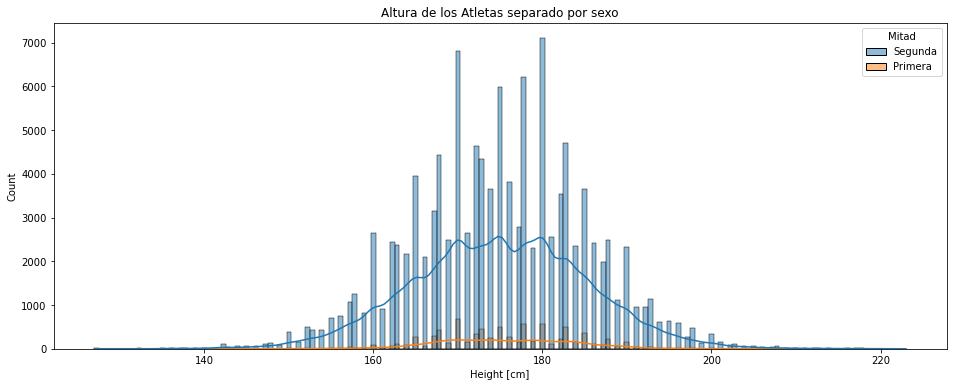

In [58]:
# Histograma de la distribució sw peso de los 
plt.figure(figsize=(16, 6))
sns.histplot(data=df_20, x='Height', hue='Mitad', kde=True)

plt.title('Altura de los Atletas separado por sexo');
plt.xlabel('Height [cm]');

Hipotesis:
- $H_0: \mu_1 = \mu_2$  La altura media de los atletas en la primera mitad del siglo 20 **es igual** a la altura media de los atletas en la segunda mitad del siglo 20.
- $H_1: \mu_1 <\mu_2$ La altura media de los atletas en la primera mitad del siglo 20 **es diferente** a la altura media de los atletas en la segunda mitad del siglo 20

In [44]:
# Utilitzsem la prova ' t-test (equivalent a Student's t-test però
# quan no podem assegurar que dues poblacions tinguin mateixa variança)
#1 tailed

ALPHA = 0.05

height_primera = df_20.loc[df_20.Mitad=='Primera','Height']
height_segunda = df_20.loc[df_20.Mitad=='Segunda','Height']

stat, p = ttest_ind(height_primera,height_segunda, alternative='greater', equal_var=False)## utlizamos greater.

print(f't-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

t-statistic = 8.396
p-value = 0.000
We can reject H0


In [51]:
df_20[df_20['Mitad']=='Primera']['Height'].mean()

175.76090188305253

In [52]:
df_20[df_20['Mitad']=='Segunda']['Height'].mean()

174.959824146094

***

## Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 

In [56]:
df.Sport.value_counts()

Athletics                    32907
Swimming                     19150
Gymnastics                   18662
Cycling                       7976
Rowing                        7920
Cross Country Skiing          7669
Shooting                      7669
Fencing                       6962
Alpine Skiing                 6394
Canoeing                      5560
Wrestling                     5346
Sailing                       4939
Football                      4647
Biathlon                      4631
Ice Hockey                    4611
Equestrianism                 4602
Boxing                        4578
Speed Skating                 4523
Hockey                        4315
Basketball                    3881
Judo                          3400
Handball                      3349
Volleyball                    3283
Weightlifting                 3008
Water Polo                    2788
Bobsleigh                     2272
Diving                        2078
Tennis                        2042
Ski Jumping         

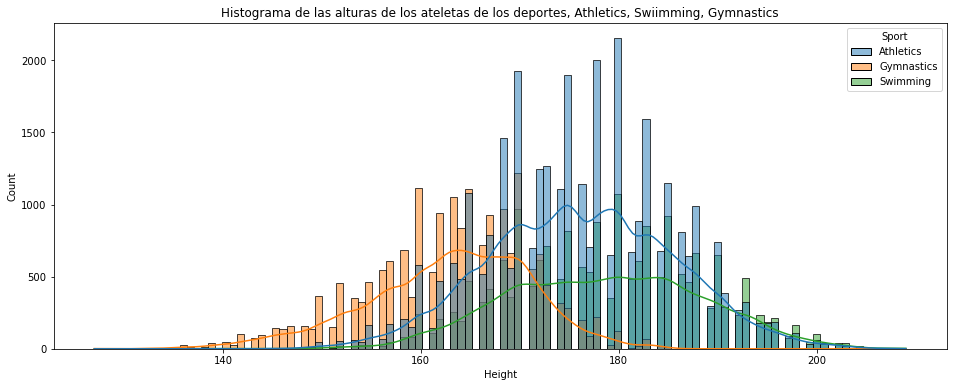

In [64]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df[df.Sport.str.match('Athletics|Swimming|Gymnastics')], x='Height', hue='Sport', kde=True)

plt.title('Histograma de las alturas de los ateletas de los deportes, Athletics, Swiimming, Gymnastics');

Hipotesis:
- $H_0: \mu_B = \mu_V = \mu_W$  Las alturas de los deportistas de At **son iguales**
- $H_1$: Las tres medianas **no son iguales**

In [65]:
# Utilizamos el test ANOVA para tres grupos

ALPHA = 0.05

height_basketball = df.loc[df.Sport=='Basketball','Height'].dropna()
height_volleyball = df.loc[df.Sport=='Volleyball','Height'].dropna()
height_weightlifting = df.loc[df.Sport=='Weightlifting','Height'].dropna()

stat, p = f_oneway(height_basketball,  height_volleyball, height_weightlifting)

print(f'F-statistic = {stat:.3f}\np-value = {p:.3f}')
print('We can not reject H0') if p > ALPHA else print('We can reject H0')

F-statistic = 4295.366
p-value = 0.000
We can reject H0


Conclusión 1:

Rechazamos la hipótesis nula. Podemos afirmar con un nivel de signifiancia del 5%, que la altura media de los ateletas que compiten en Atletismo, Natación y Gimnasia  **no es la misma**.

El Test ANOVA nos dice que podemos afirmar que las medias no son iguales. Pero no nos permite decir si son iguales dos a dos. Para ello hemos de aplicar el test de TUKEY



In [68]:
# Comparació de multiples grups per parells (Tukey HSD)

ALPHA = 0.05

foo = df.loc[df.Sport.str.match('Athletics|Swimming|Gymnastics'), ['Height','Sport']].dropna()

m_comp = pairwise_tukeyhsd(endog=foo['Height'], groups=foo['Sport'], alpha=ALPHA)

print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj  lower    upper   reject
-------------------------------------------------------------
 Athletics Gymnastics -13.3202 0.001 -13.5183 -13.1222   True
 Athletics   Swimming   2.3062 0.001   2.1098   2.5026   True
Gymnastics   Swimming  15.6264 0.001  15.4041  15.8487   True
-------------------------------------------------------------


Conclusión 2:
Podemos afirmar con un nivel de significancia del 5% que ninguna de las medias de altura de los deportes de Atletismo, Natación y Gimnasia es la misma.

***